<a href="https://colab.research.google.com/github/mharshavardhan224/DataAnalyst/blob/main/Harsha_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
data = pd.read_csv('/content/dataset.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
# prompt: Generate the code for CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

# Checking for missing values
print(data.isnull().sum())

# Checking for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
Number of duplicate rows: 0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

<ipython-input-11-dd799a186319>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], ax=axes[row, col], palette="viridis")
<ipython-input-11-dd799a186319>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], ax=axes[row, col], palette="viridis")
<ipython-input-11-dd799a186319>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], ax=axes[row, col], palette="viridis")
<ipython-input-11-dd799a186319>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

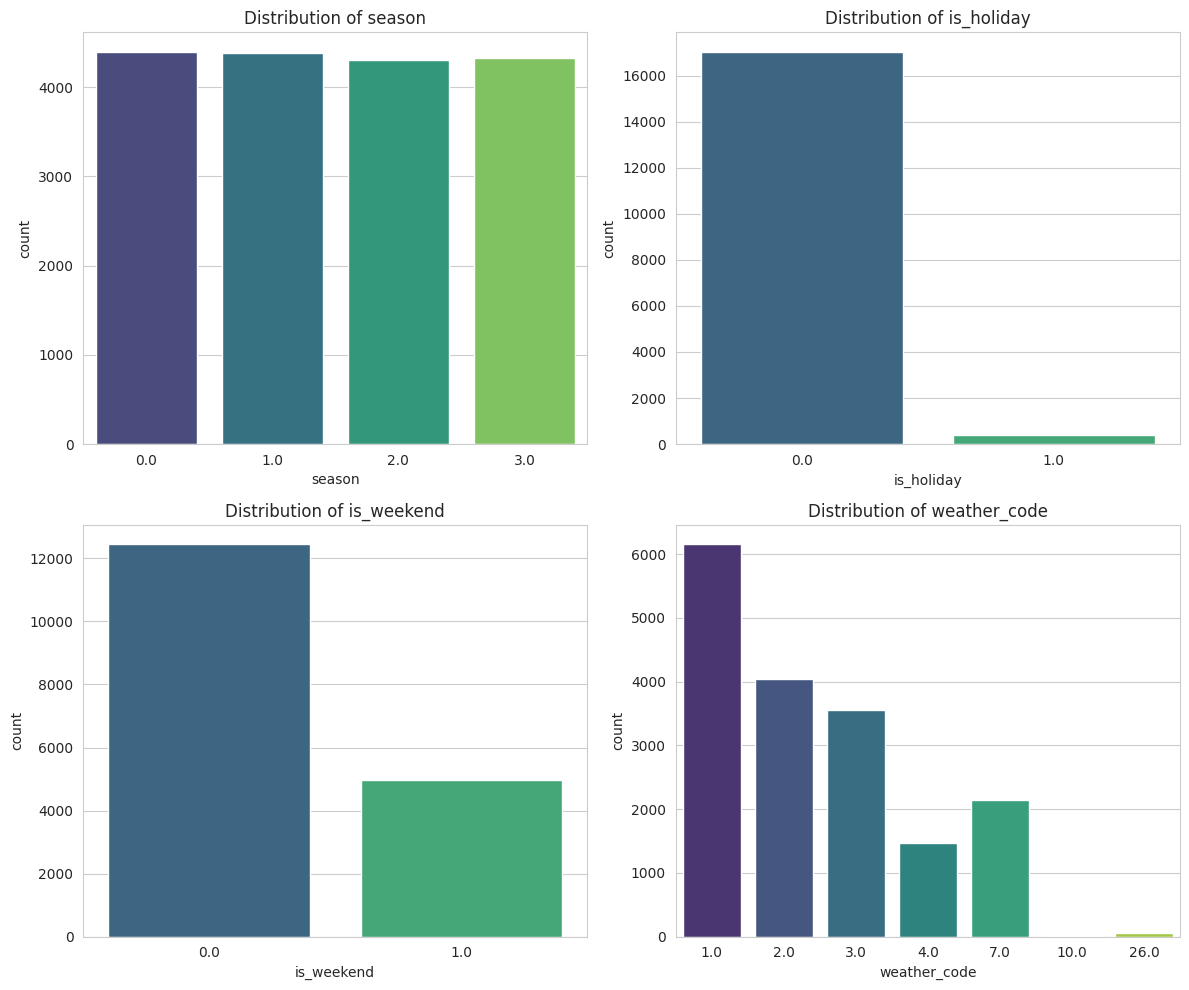

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Define discrete categorical features
discrete_features = ["season", "is_holiday", "is_weekend", "weather_code"]

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Loop through each feature and plot distribution
for i, feature in enumerate(discrete_features):
    row, col = divmod(i, 2)
    sns.countplot(x=df[feature], ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"Distribution of {feature}")

# Adjust layout
plt.tight_layout()
plt.show()


PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE


In [12]:
# prompt: generate the code for LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

# Check data types of each variable
df.dtypes



,0
cnt,int64
t1,float64
t2,float64
hum,float64
wind_speed,float64
weather_code,float64
is_holiday,float64
is_weekend,float64
season,float64


LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX


In [13]:
# prompt: generate the code for MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

# Extract date and time features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
df['dayofyear'] = df.index.dayofyear

# Define a function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# Apply the function to create a 'season' column
df['season_extracted'] = df['month'].apply(get_season)

# Example of creating a 'time_of_day' feature
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'
df['time_of_day'] = df['hour'].apply(get_time_of_day)

# Display the updated DataFrame
print(df.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2015-01-04 00:00:00         0.0         1.0     3.0  2015      1    4   
2015-01-04 01:00:00         0.0         1.0     3.0  2015      1    4   
2015-01-04 02:00:00         0.0         1.0     3.0  2015      1    4   
2015-01-04 03:00:00         0.0         1.0     3.0  2015      1    4   
2015-01-04 04:00:00         0.0         1.0     3.0  2015      1

MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

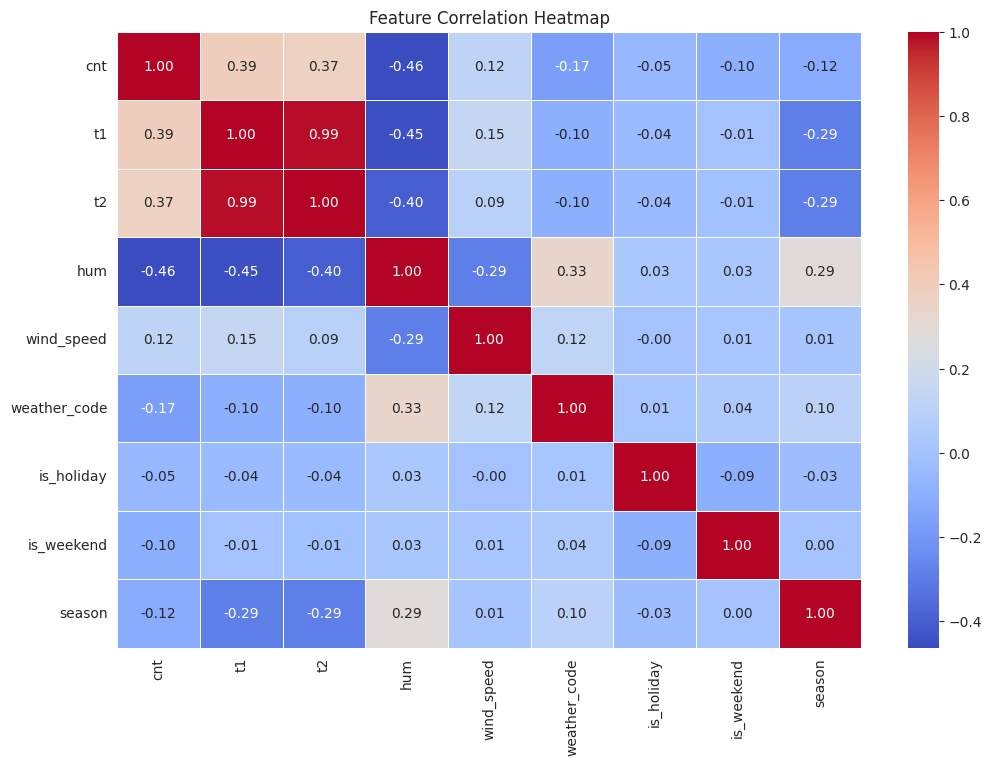

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Compute correlation matrix and plot heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()


VISUALIZING THE CORRELATION WITH A HEATMAP

<ipython-input-19-daf12884a34c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")


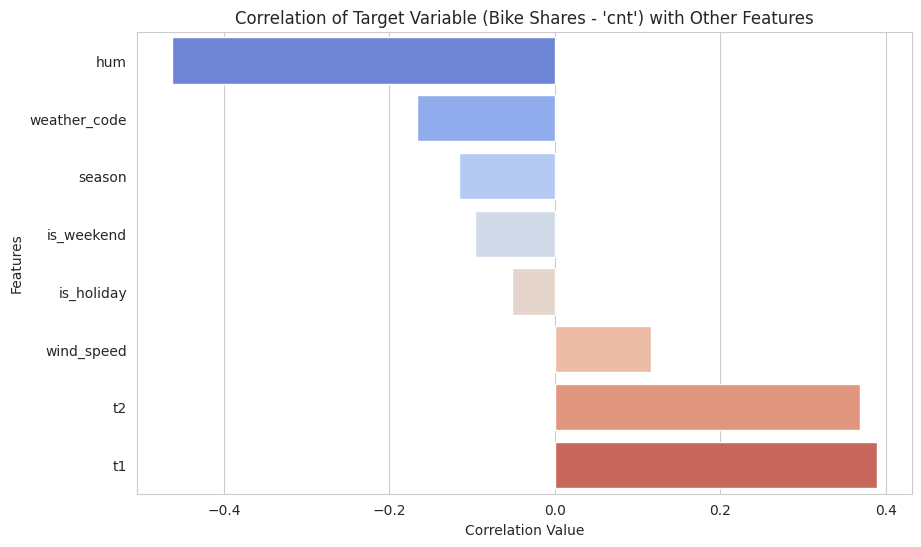

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Compute correlation with the target variable 'cnt'
correlation = df.corr()["cnt"].drop("cnt").sort_values()

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot for correlation with target variable
sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")

# Set titles and labels
plt.title("Correlation of Target Variable (Bike Shares - 'cnt') with Other Features")
plt.xlabel("Correlation Value")
plt.ylabel("Features")

# Show plot
plt.show()


VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO


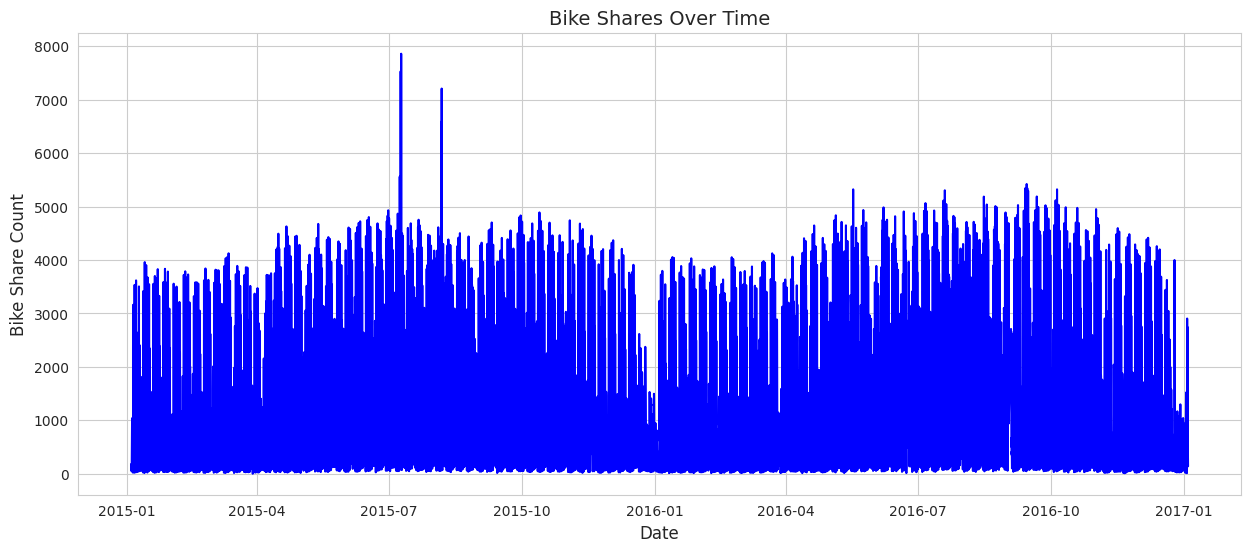

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Set figure size
plt.figure(figsize=(15, 6))

# Create line plot for bike shares over time
sns.lineplot(data=df, x=df.index, y="cnt", color="blue")

# Set title and labels
plt.title("Bike Shares Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Bike Share Count", fontsize=12)

# Show plot
plt.show()

PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT


<function seaborn.categorical.pointplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, color=None, palette=None, hue_norm=None, markers=<default>, linestyles=<default>, dodge=False, log_scale=None, native_scale=False, orient=None, capsize=0, formatter=None, legend='auto', err_kws=None, ci=<deprecated>, errwidth=<deprecated>, join=<deprecated>, scale=<deprecated>, ax=None, **kwargs)>

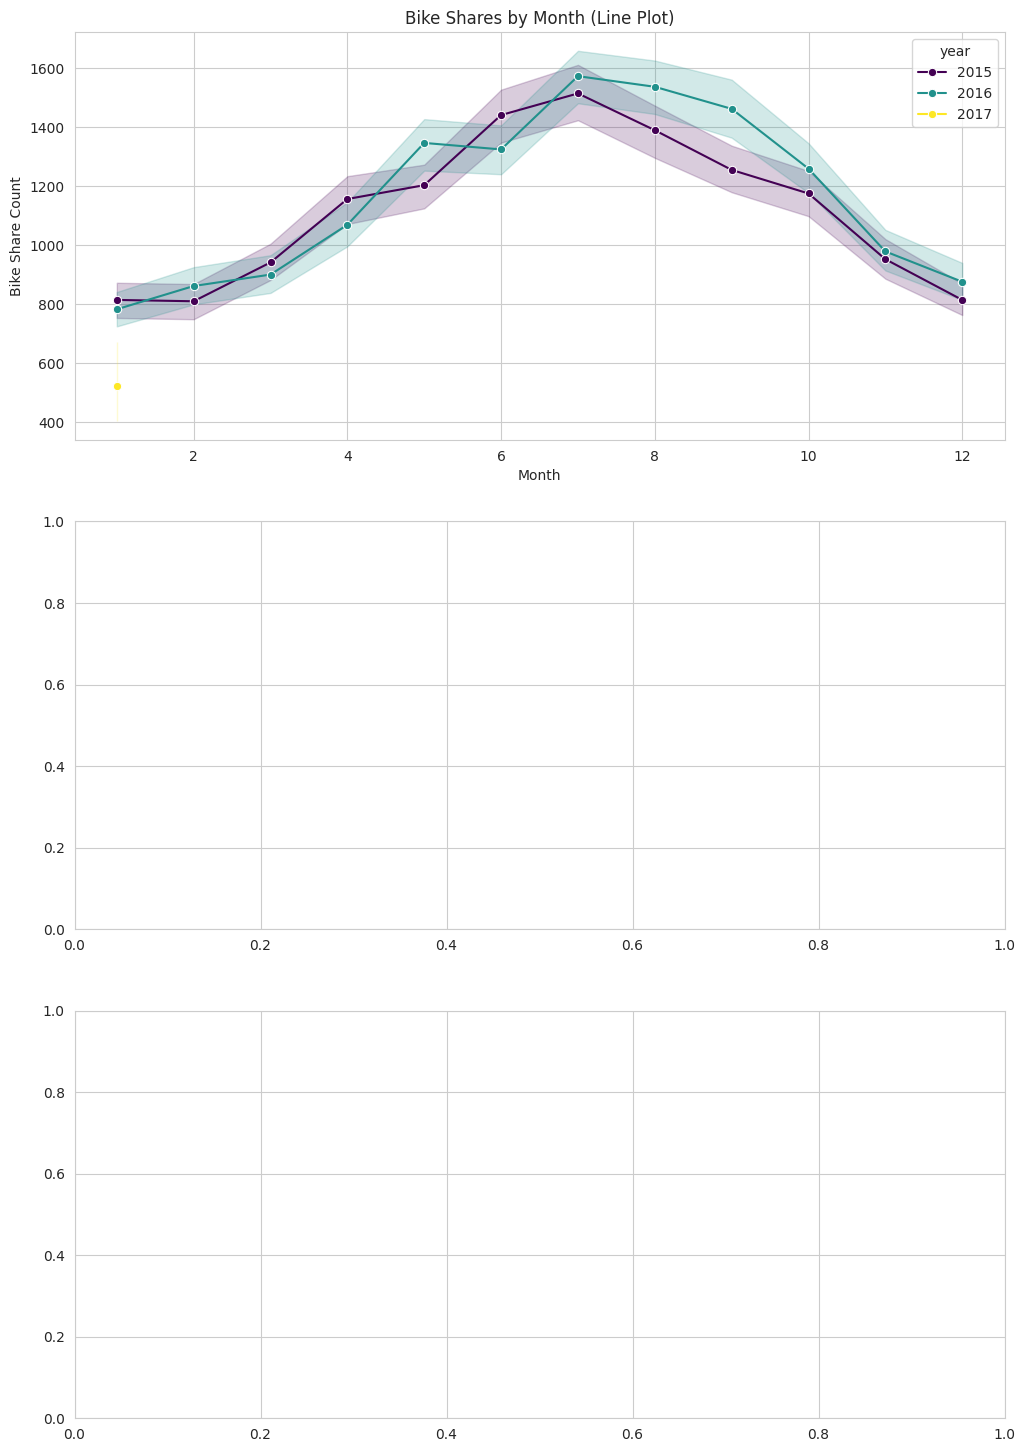

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Extract year and month for analysis
df["year"] = df.index.year
df["month"] = df.index.month

# Set plot style
sns.set_style("whitegrid")

# Create figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# --- LINE PLOT ---
sns.lineplot(data=df, x="month", y="cnt", hue="year", marker="o", palette="viridis", ax=axes[0])
axes[0].set_title("Bike Shares by Month (Line Plot)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Bike Share Count")

# --- POINT PLOT ---
sns.pointplot

PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)


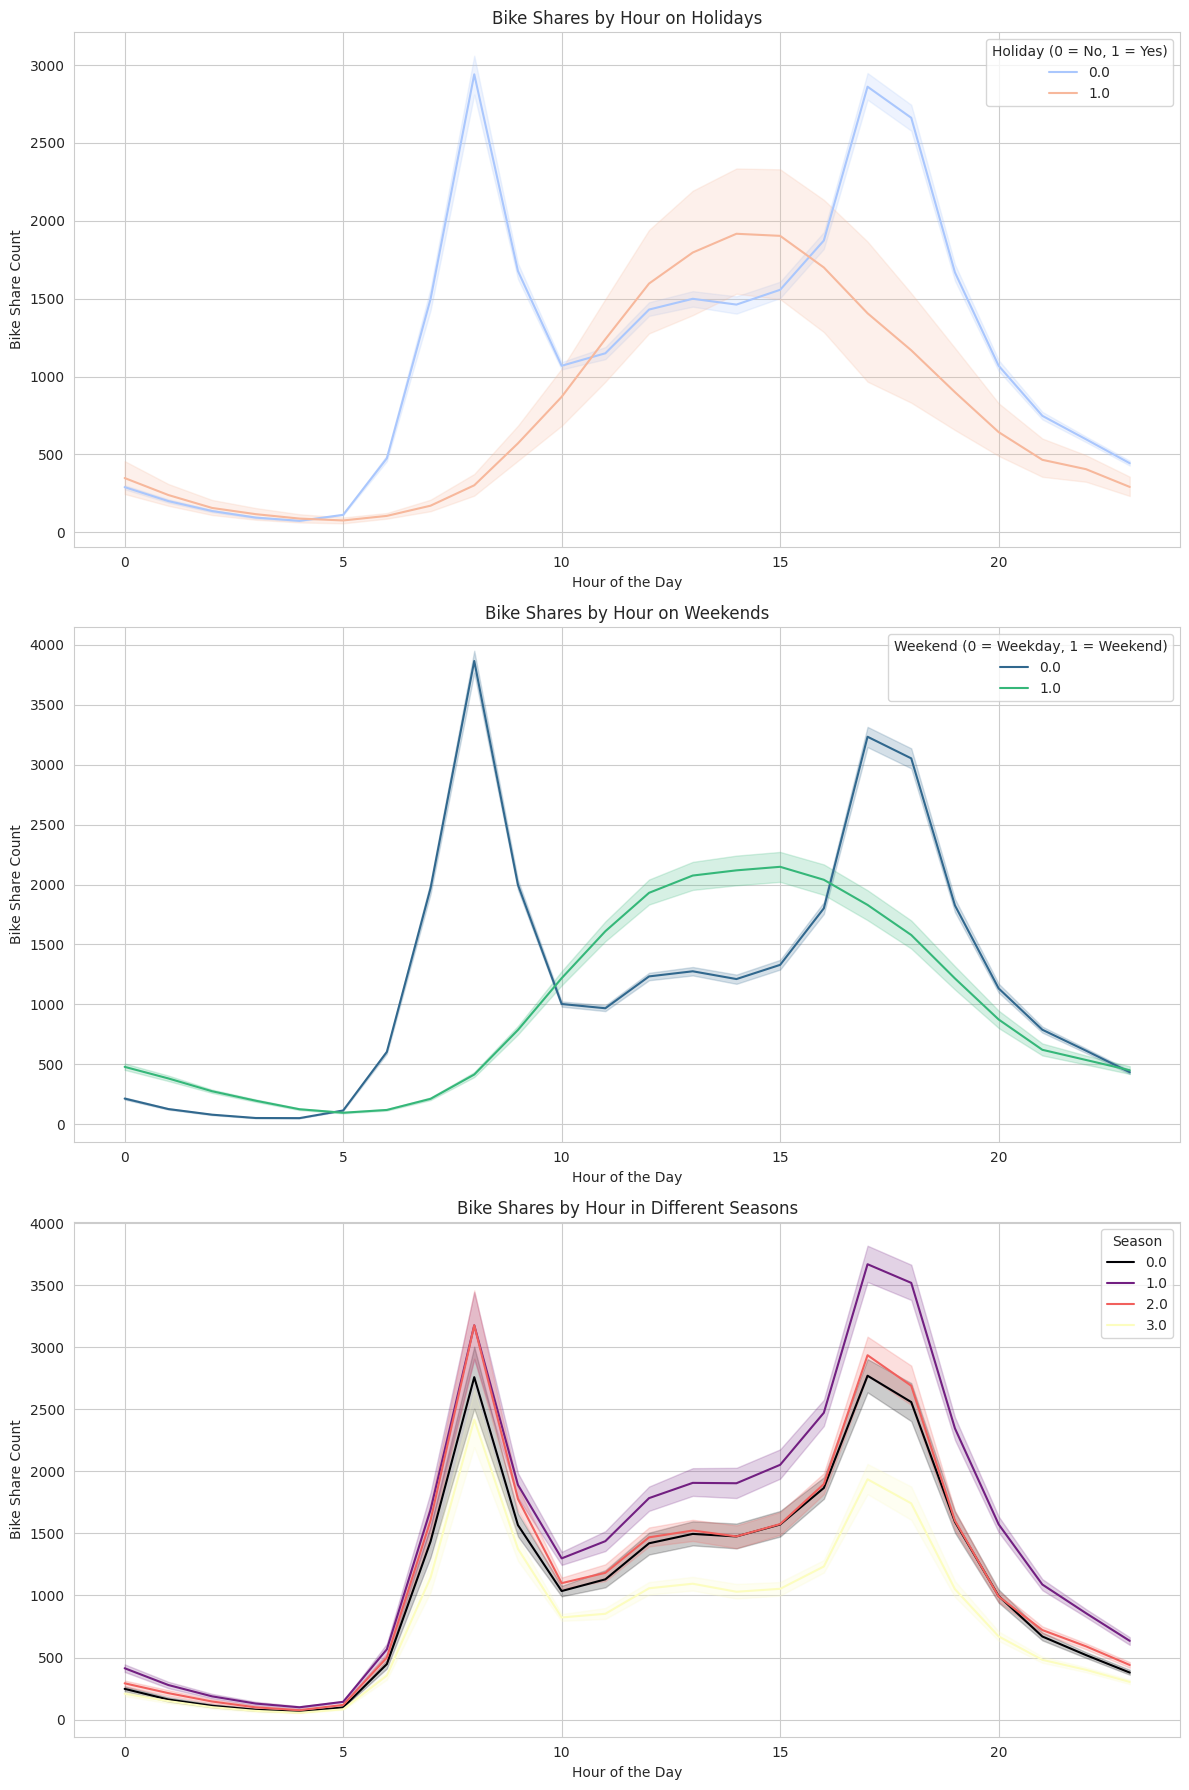

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Extract hour for analysis
df["hour"] = df.index.hour

# Set plot style
sns.set_style("whitegrid")

# Create figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# --- LINE PLOT: Bike Shares by Hour on Holidays ---
sns.lineplot(data=df, x="hour", y="cnt", hue="is_holiday", palette="coolwarm", ax=axes[0])
axes[0].set_title("Bike Shares by Hour on Holidays")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Bike Share Count")
axes[0].legend(title="Holiday (0 = No, 1 = Yes)")

# --- LINE PLOT: Bike Shares by Hour on Weekends ---
sns.lineplot(data=df, x="hour", y="cnt", hue="is_weekend", palette="viridis", ax=axes[1])
axes[1].set_title("Bike Shares by Hour on Weekends")
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Bike Share Count")
axes[1].legend(title="Weekend (0 = Weekday, 1 = Weekend)")

# --- LINE PLOT: Bike Shares by Hour in Different Seasons ---
sns.lineplot(data=df, x="hour", y="cnt", hue="season", palette="magma", ax=axes[2])
axes[2].set_title("Bike Shares by Hour in Different Seasons")
axes[2].set_xlabel("Hour of the Day")
axes[2].set_ylabel("Bike Share Count")
axes[2].legend(title="Season")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)


<ipython-input-23-6159d0c60624>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="cnt", data=df, palette="coolwarm")


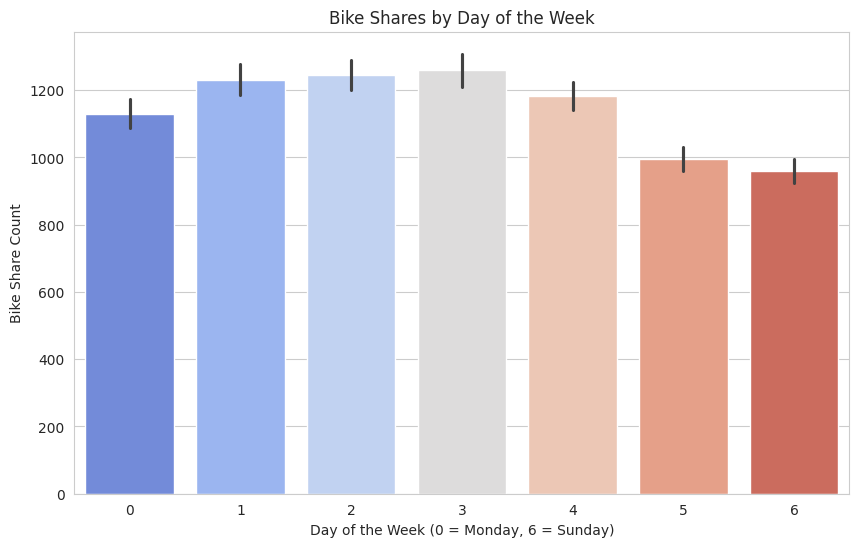

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Extract day of the week (0 = Monday, 6 = Sunday)
df["day_of_week"] = df.index.dayofweek

# Set plot style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="day_of_week", y="cnt", data=df, palette="coolwarm")

# Set titles and labels
plt.title("Bike Shares by Day of the Week")
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Bike Share Count")

# Show plot
plt.show()


PLOTTING BIKE SHARES BY DAY OF WEEK

<ipython-input-24-a80877bb65fd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_month", y="cnt", data=df, palette="coolwarm")


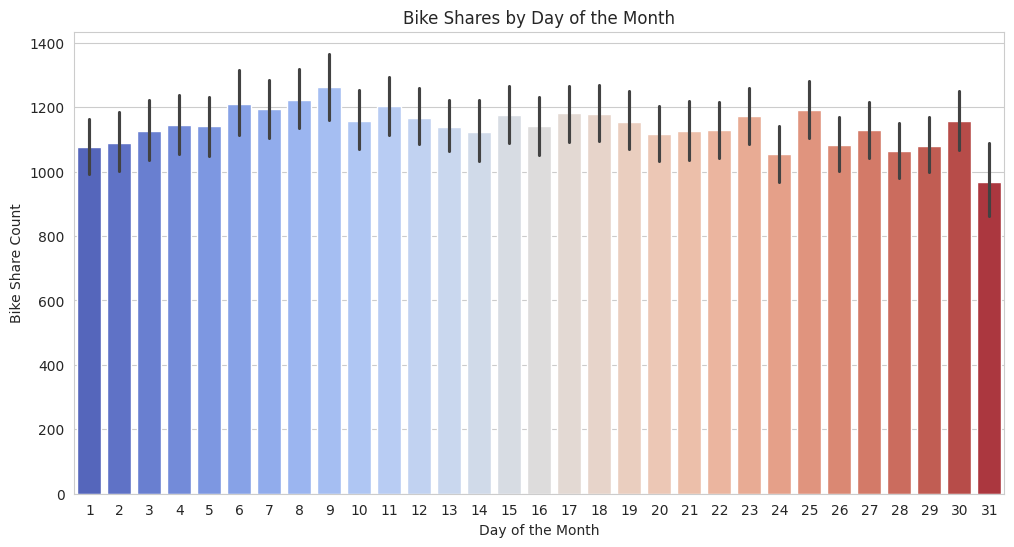

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Extract day of the month
df["day_of_month"] = df.index.day

# Set plot style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="day_of_month", y="cnt", data=df, palette="coolwarm")

# Set titles and labels
plt.title("Bike Shares by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Bike Share Count")

# Show plot
plt.show()

PLOTTING BIKE SHARES BY DAY OF MONTH


<ipython-input-25-5a8ce1bca19a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="cnt", data=df, palette="viridis")


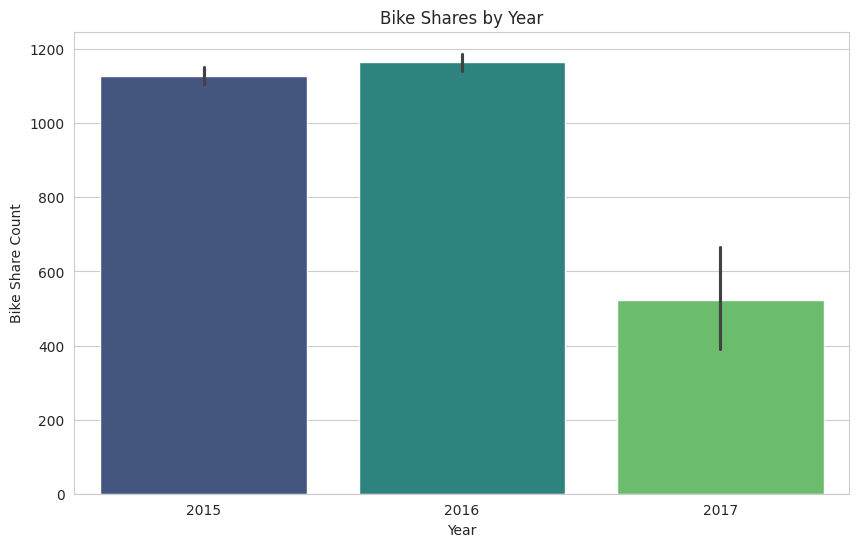

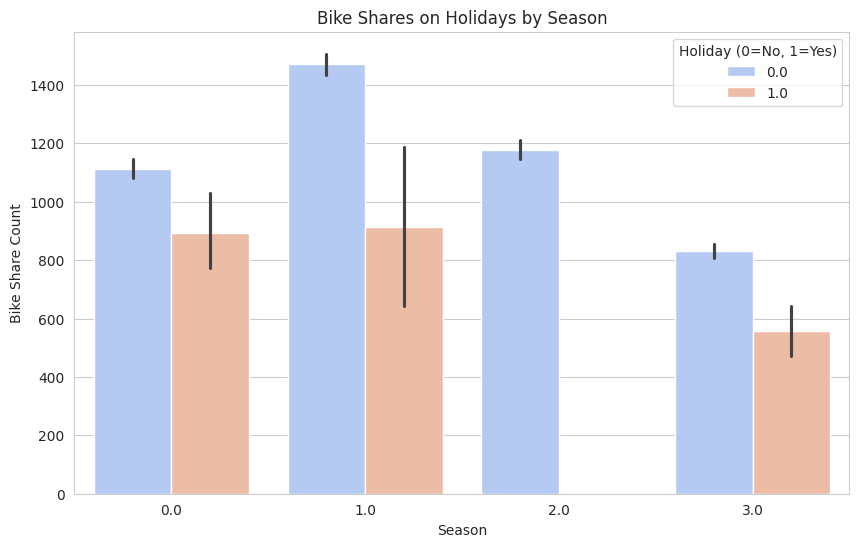

In [25]:
# prompt: Generate a code for PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Extract year for analysis
df["year"] = df.index.year

# Plotting Bike Shares by Year
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="cnt", data=df, palette="viridis")
plt.title("Bike Shares by Year")
plt.xlabel("Year")
plt.ylabel("Bike Share Count")
plt.show()


# Plotting Bike Shares on Holidays by Season
# Assuming you have a 'season' column (e.g., from previous feature engineering)
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="cnt", hue="is_holiday", data=df, palette="coolwarm")
plt.title("Bike Shares on Holidays by Season")
plt.xlabel("Season")
plt.ylabel("Bike Share Count")
plt.legend(title="Holiday (0=No, 1=Yes)")
plt.show()


PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS

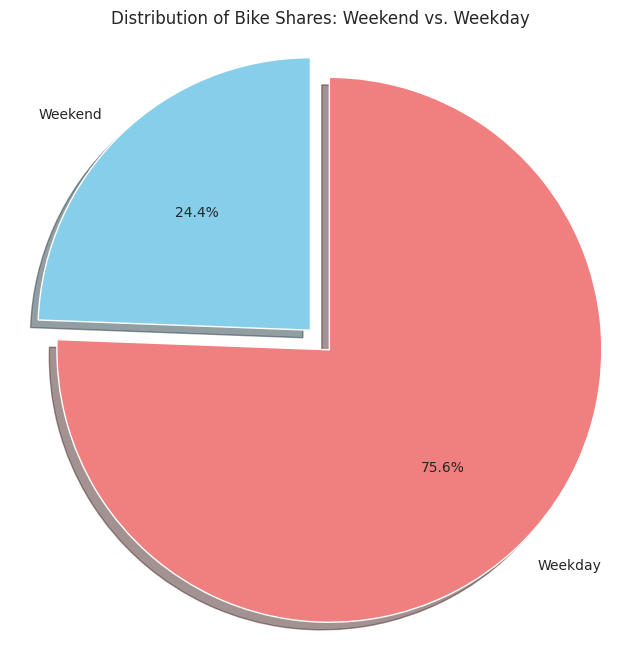

<ipython-input-26-352c408a53bc>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=[weekend_shares, weekday_shares], palette=colors)


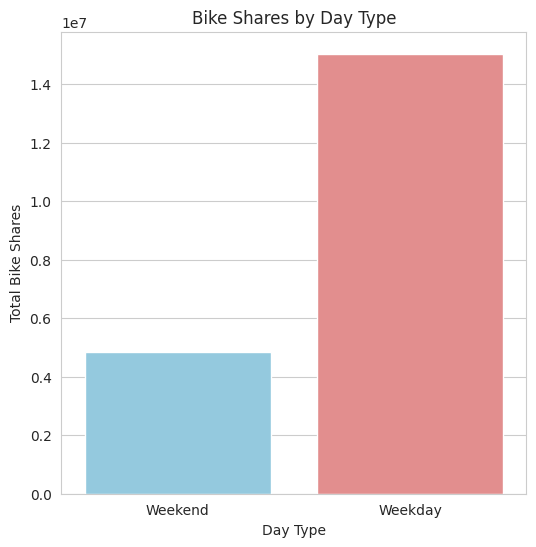

In [26]:
# prompt: VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Create 'is_weekend' column (assuming 'dayofweek' is available)
df['is_weekend'] = df.index.dayofweek >= 5  # 5=Saturday, 6=Sunday

# Calculate the total bike shares for weekdays and weekends
weekend_shares = df[df["is_weekend"] == True]["cnt"].sum()
weekday_shares = df[df["is_weekend"] == False]["cnt"].sum()

# Pie chart
labels = ['Weekend', 'Weekday']
sizes = [weekend_shares, weekday_shares]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Explode the weekend slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Bike Shares: Weekend vs. Weekday')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=labels, y=[weekend_shares, weekday_shares], palette=colors)
plt.title('Bike Shares by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Bike Shares')
plt.show()


VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

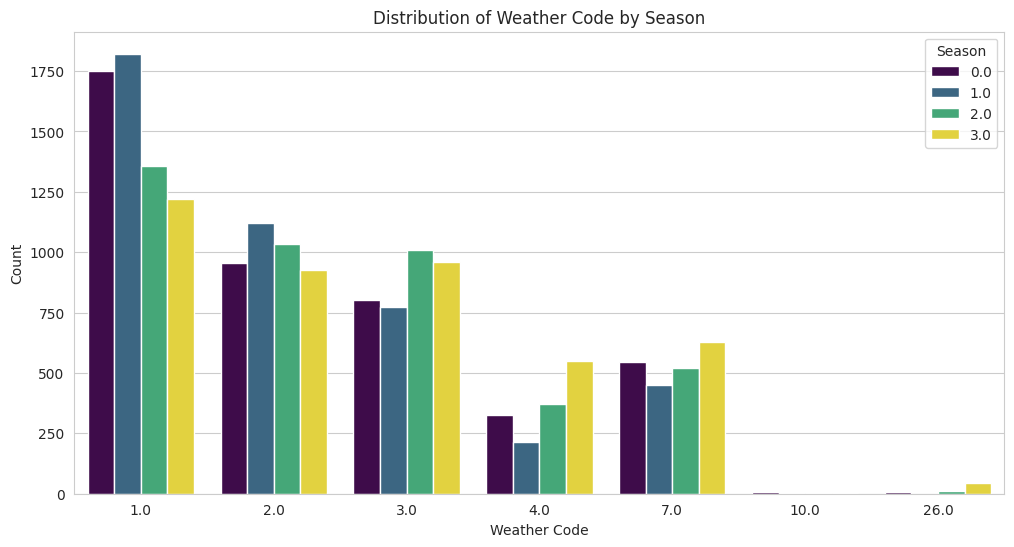

In [28]:
# prompt: Generate a code for PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = "dataset.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime and set it as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Assuming you have a 'season' column (if not, create it as in previous examples)
# ... (code to create 'season' column if it doesn't exist) ...

# Plotting the distribution of weather code by season
plt.figure(figsize=(12, 6))
sns.countplot(x="weather_code", hue="season", data=df, palette="viridis")
plt.title("Distribution of Weather Code by Season")
plt.xlabel("Weather Code")
plt.ylabel("Count")
plt.legend(title="Season")
plt.show()


PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON